In [5]:

import pandas as pd 
dt=pd.read_csv('semantic.csv')

In [6]:
dt

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [7]:
print(dt.shape)

(5842, 2)


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


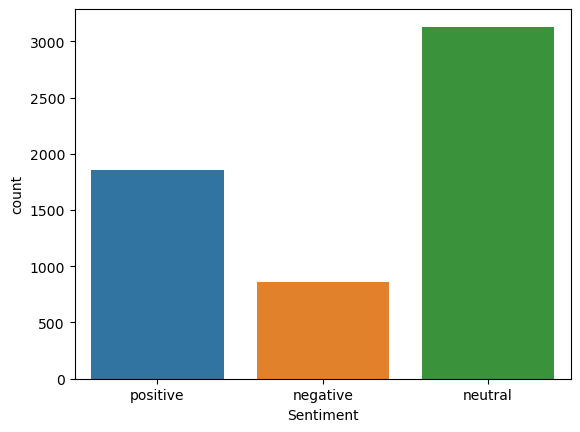

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x ='Sentiment', data = dt)
 
plt.show()

In [10]:
import re
import numpy as np
import pandas as pd
# import spacy
import string
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



In [11]:
# Data Preprocessing
# i. Removal of URl 
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
dt["text_rv_url"] = dt["Sentence"].apply(lambda text: remove_urls(text))
dt[['Sentence', 'text_rv_url']].head()



,Sentence,text_rv_url
0,The GeoSolutions technology will leverage Bene...,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,"For the last quarter of 2010 , Componenta 's n...","For the last quarter of 2010 , Componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...,The Swedish buyout firm has sold its remaining...


In [12]:
# Data Preprocessing

# ii. Removal of html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
dt["text_rv_html"] = dt["text_rv_url"].apply(lambda text: remove_html(text))
dt[['text_rv_url', 'text_rv_html']].head()



,text_rv_url,text_rv_html
0,The GeoSolutions technology will leverage Bene...,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,"For the last quarter of 2010 , Componenta 's n...","For the last quarter of 2010 , Componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...,The Swedish buyout firm has sold its remaining...


In [13]:
# Data Preprocessing

# iii. lower case letter
dt["text_lower"] = dt["text_rv_html"].str.lower()
dt[['text_rv_html', 'text_lower']].head()



,text_rv_html,text_lower
0,The GeoSolutions technology will leverage Bene...,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...","$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"For the last quarter of 2010 , Componenta 's n...","for the last quarter of 2010 , componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,according to the finnish-russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


In [14]:
# Data Preprocessing


# iv. Removal OF Punctuation
punctuation = string.punctuation
print(punctuation)
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))
dt["text_rv_punct"] = dt["text_lower"].apply(lambda text: remove_punctuation(text))
dt[['text_lower', 'text_rv_punct']].head()



!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,text_lower,text_rv_punct
0,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down 150 to 250 bk a real possibility
2,"for the last quarter of 2010 , componenta 's n...",for the last quarter of 2010 componenta s net...
3,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...
4,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


In [15]:
# Data Preprocessing
# v. Removal of Digits
from string import digits

def remove_digits(text):
    return text.translate(str.maketrans('', '', digits))

dt["text_rv_digits"] = dt["text_rv_punct"].apply(lambda text: remove_digits(text))
dt[['text_rv_punct', 'text_rv_digits']].head()

,text_rv_punct,text_rv_digits
0,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...
1,esi on lows down 150 to 250 bk a real possibility,esi on lows down to bk a real possibility
2,for the last quarter of 2010 componenta s net...,for the last quarter of componenta s net sal...
3,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...
4,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


In [16]:
# Data Preprocessing
#vi. Removal of stopwords
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(stopwords)
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in stopwords])  #List Comprehension
dt["text_rv_stop"] = dt["text_rv_digits"].apply(lambda text: remove_stopwords(text))
dt[['text_rv_digits', 'text_rv_stop']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\H.A.R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,text_rv_digits,text_rv_stop
0,the geosolutions technology will leverage bene...,geosolutions technology leverage benefon gps s...
1,esi on lows down to bk a real possibility,esi lows bk real possibility
2,for the last quarter of componenta s net sal...,last quarter componenta net sales doubled eurm...
3,according to the finnishrussian chamber of com...,according finnishrussian chamber commerce majo...
4,the swedish buyout firm has sold its remaining...,swedish buyout firm sold remaining percent sta...


In [17]:
# Data Preprocessing
#vii. Removal of WhiteSpace
def remove_whitespace(text):
    return  " ".join(text.split())
dt["text_rv_whitespaces"] = dt["text_rv_stop"].apply(lambda text: remove_whitespace(text))
dt[['text_rv_stop', 'text_rv_whitespaces']].head()

,text_rv_stop,text_rv_whitespaces
0,geosolutions technology leverage benefon gps s...,geosolutions technology leverage benefon gps s...
1,esi lows bk real possibility,esi lows bk real possibility
2,last quarter componenta net sales doubled eurm...,last quarter componenta net sales doubled eurm...
3,according finnishrussian chamber commerce majo...,according finnishrussian chamber commerce majo...
4,swedish buyout firm sold remaining percent sta...,swedish buyout firm sold remaining percent sta...


In [18]:
# Data Preprocessing
#REMOVAL OF NON ENGLISH WORD
import re
import unicodedata
def remove_data(text):
    url_pattern = re.compile(r'[^a-zA-Z\s]')
    return url_pattern.sub(r'', text)
dt['text_rv_un']=dt['text_rv_whitespaces'].apply(lambda x: remove_data(x))
dt[['text_rv_whitespaces','text_rv_un']]

,text_rv_whitespaces,text_rv_un
0,geosolutions technology leverage benefon gps s...,geosolutions technology leverage benefon gps s...
1,esi lows bk real possibility,esi lows bk real possibility
2,last quarter componenta net sales doubled eurm...,last quarter componenta net sales doubled eurm...
3,according finnishrussian chamber commerce majo...,according finnishrussian chamber commerce majo...
4,swedish buyout firm sold remaining percent sta...,swedish buyout firm sold remaining percent sta...
...,...,...
5837,rising costs forced packaging producer huhtama...,rising costs forced packaging producer huhtama...
5838,nordic walking first used summer training meth...,nordic walking first used summer training meth...
5839,according shipping company viking line eu deci...,according shipping company viking line eu deci...
5840,building home improvement trade sales decrease...,building home improvement trade sales decrease...


In [19]:
# Data Preprocessing
#LEMMATIZATION
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [20]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\H.A.R\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
import nltk
nltk.download('wordnet')
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

dt["text_lemmatized"] = dt["text_rv_un"].apply(lambda text: lemmatize_words(text))
dt[['text_rv_un','text_lemmatized']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\H.A.R\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text_rv_un,text_lemmatized
0,geosolutions technology leverage benefon gps s...,geosolutions technology leverage benefon gps s...
1,esi lows bk real possibility,esi low bk real possibility
2,last quarter componenta net sales doubled eurm...,last quarter componenta net sale doubled eurm ...
3,according finnishrussian chamber commerce majo...,according finnishrussian chamber commerce majo...
4,swedish buyout firm sold remaining percent sta...,swedish buyout firm sold remaining percent sta...


In [22]:
# Data Preprocessing
#Tokenization
from nltk import sent_tokenize, word_tokenize
var=dt['text_lemmatized'].tolist()


In [23]:
import nltk
nltk.download('punkt')
list=[]
for i in var:
    tokens_ = nltk.word_tokenize(i)
    list.append(tokens_)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\H.A.R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
#Convert Preprocessed data into numerical features
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dt['Sentiment']=label_encoder.fit_transform(dt["Sentiment"])
dt[['Sentiment']]

,Sentiment
0,2
1,0
2,2
3,1
4,1
...,...
5837,0
5838,1
5839,1
5840,1


In [25]:
#BAG-OF-WORDS
from sklearn.feature_extraction.text import CountVectorizer
bow_model = CountVectorizer()
print(bow_model.fit_transform(var))

  (0, 3345)	1
  (0, 8381)	2
  (0, 4713)	1
  (0, 782)	1
  (0, 3431)	1
  (0, 7832)	1
  (0, 6582)	1
  (0, 4822)	2
  (0, 699)	1
  (0, 7440)	1
  (0, 1554)	1
  (0, 6265)	1
  (0, 6924)	1
  (0, 5428)	1
  (0, 1710)	1
  (0, 5543)	1
  (0, 6382)	1
  (0, 1535)	1
  (0, 5321)	1
  (1, 2670)	1
  (1, 4884)	1
  (1, 866)	1
  (1, 6782)	1
  (1, 6357)	1
  (2, 4621)	1
  :	:
  (5840, 7300)	1
  (5840, 2710)	1
  (5840, 1091)	1
  (5840, 5310)	1
  (5840, 8648)	1
  (5840, 2012)	1
  (5840, 3747)	1
  (5840, 3924)	1
  (5841, 3666)	1
  (5841, 4903)	1
  (5841, 3173)	1
  (5841, 7287)	1
  (5841, 8012)	2
  (5841, 809)	1
  (5841, 5864)	1
  (5841, 177)	1
  (5841, 1839)	1
  (5841, 3781)	1
  (5841, 5192)	1
  (5841, 4512)	1
  (5841, 6503)	1
  (5841, 3970)	1
  (5841, 4416)	1
  (5841, 4581)	1
  (5841, 8098)	1


In [26]:
bow_model.vocabulary_

{'geosolutions': 3345,
 'technology': 8381,
 'leverage': 4713,
 'benefon': 782,
 'gps': 3431,
 'solution': 7832,
 'providing': 6582,
 'location': 4822,
 'based': 699,
 'search': 7440,
 'community': 1554,
 'platform': 6265,
 'relevant': 6924,
 'multimedia': 5428,
 'content': 1710,
 'new': 5543,
 'powerful': 6382,
 'commercial': 1535,
 'model': 5321,
 'esi': 2670,
 'low': 4884,
 'bk': 866,
 'real': 6782,
 'possibility': 6357,
 'last': 4621,
 'quarter': 6662,
 'componenta': 1605,
 'net': 5529,
 'sale': 7300,
 'doubled': 2309,
 'eurm': 2713,
 'period': 6134,
 'year': 9408,
 'earlier': 2395,
 'moved': 5395,
 'zero': 9457,
 'pretax': 6446,
 'profit': 6515,
 'loss': 4871,
 'according': 48,
 'finnishrussian': 3031,
 'chamber': 1322,
 'commerce': 1534,
 'major': 4980,
 'construction': 1692,
 'company': 1572,
 'finland': 3019,
 'operating': 5833,
 'russia': 7245,
 'swedish': 8256,
 'buyout': 1127,
 'firm': 3040,
 'sold': 7824,
 'remaining': 6937,
 'percent': 6126,
 'stake': 7963,
 'almost': 273,

In [27]:
bow_df = pd.DataFrame(bow_model.fit_transform(var).todense())
bow_df.columns = sorted(bow_model.vocabulary_)
bow_df

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zloty,znga,zoltan,zone,zoo,zsl,zte,zu,zurich,zxx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
dt.columns

Index(['Sentence', 'Sentiment', 'text_rv_url', 'text_rv_html', 'text_lower',
       'text_rv_punct', 'text_rv_digits', 'text_rv_stop',
       'text_rv_whitespaces', 'text_rv_un', 'text_lemmatized'],
      dtype='object')

In [29]:
#split the data into x and y
X=bow_df
y=dt[['Sentiment']]

In [30]:
X.shape

(5842, 9472)

In [31]:
y.shape

(5842, 1)

In [32]:
dt

,Sentence,Sentiment,text_rv_url,text_rv_html,text_lower,text_rv_punct,text_rv_digits,text_rv_stop,text_rv_whitespaces,text_rv_un,text_lemmatized
0,The GeoSolutions technology will leverage Bene...,2,The GeoSolutions technology will leverage Bene...,The GeoSolutions technology will leverage Bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,geosolutions technology leverage benefon gps s...,geosolutions technology leverage benefon gps s...,geosolutions technology leverage benefon gps s...,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,"$ESI on lows, down $1.50 to $2.50 BK a real po...","$ESI on lows, down $1.50 to $2.50 BK a real po...","$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down 150 to 250 bk a real possibility,esi on lows down to bk a real possibility,esi lows bk real possibility,esi lows bk real possibility,esi lows bk real possibility,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",2,"For the last quarter of 2010 , Componenta 's n...","For the last quarter of 2010 , Componenta 's n...","for the last quarter of 2010 , componenta 's n...",for the last quarter of 2010 componenta s net...,for the last quarter of componenta s net sal...,last quarter componenta net sales doubled eurm...,last quarter componenta net sales doubled eurm...,last quarter componenta net sales doubled eurm...,last quarter componenta net sale doubled eurm ...
3,According to the Finnish-Russian Chamber of Co...,1,According to the Finnish-Russian Chamber of Co...,According to the Finnish-Russian Chamber of Co...,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according finnishrussian chamber commerce majo...,according finnishrussian chamber commerce majo...,according finnishrussian chamber commerce majo...,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,1,The Swedish buyout firm has sold its remaining...,The Swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,swedish buyout firm sold remaining percent sta...,swedish buyout firm sold remaining percent sta...,swedish buyout firm sold remaining percent sta...,swedish buyout firm sold remaining percent sta...
...,...,...,...,...,...,...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,0,RISING costs have forced packaging producer Hu...,RISING costs have forced packaging producer Hu...,rising costs have forced packaging producer hu...,rising costs have forced packaging producer hu...,rising costs have forced packaging producer hu...,rising costs forced packaging producer huhtama...,rising costs forced packaging producer huhtama...,rising costs forced packaging producer huhtama...,rising cost forced packaging producer huhtamak...
5838,Nordic Walking was first used as a summer trai...,1,Nordic Walking was first used as a summer trai...,Nordic Walking was first used as a summer trai...,nordic walking was first used as a summer trai...,nordic walking was first used as a summer trai...,nordic walking was first used as a summer trai...,nordic walking first used summer training meth...,nordic walking first used summer training meth...,nordic walking first used summer training meth...,nordic walking first used summer training meth...
5839,"According shipping company Viking Line , the E...",1,"According shipping company Viking Line , the E...","According shipping company Viking Line , the E...","according shipping company viking line , the e...",according shipping company viking line the eu...,according shipping company viking line the eu...,according shipping company viking line e

In [42]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils.data_utils import pad_sequences
from keras.preprocessing.text import Tokenizer

# Assume you have preprocessed data: X (list of preprocessed texts) and y (list of corresponding labels)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



x=bow_df
y=dt[['Sentiment']]

# # Naive Bayes
# vectorizer = CountVectorizer()
# vectorizer.fit_transform(x)
# vectorizer.transform(x)

# nb_classifier = MultinomialNB()
# nb_classifier.fit(x, y)
# nb_predicted = nb_classifier.predict(x)
# print("Naive Bayes Accuracy:", metrics.accuracy_score(y, nb_predicted))


# # Support Vector Machines (SVM)
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(x)
# X_test_tfidf = vectorizer.transform(x)

# svm_classifier = svm.SVC(kernel='linear')
# svm_classifier.fit(x, y)
# svm_predicted = svm_classifier.predict(x)

# print("SVM Accuracy:", metrics.accuracy_score(y, svm_predicted))

# # Recurrent Neural Network (RNN)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
X_train_seq = tokenizer.texts_to_sequences(x)
X_test_seq = tokenizer.texts_to_sequences(x)

max_seq_length = max(len(seq) for seq in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)

rnn_model = Sequential()
rnn_model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_seq_length))
rnn_model.add(LSTM(100))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# rnn_model.fit(X_train_padded, y, epochs=10, batch_size=32, validation_data=(X_test_padded, y))
rnn_model.fit(np.array(x), np.array(y), verbose=0, epochs=100)

rnn_predicted = np.round(rnn_model.predict(X_test_padded)).flatten().astype(int)
rnn_accuracy = metrics.accuracy_score(y, rnn_predicted)

print("RNN Accuracy:", rnn_accuracy)


ModuleNotFoundError: No module named 'tensorflow'